In [39]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
################# visualization #################
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py


# 1.Data Importing

In [40]:
df = pd.read_csv(r"C:\Users\Dheeraj Rane\Downloads\LogisticRegressionusingPython\Logistic Regression using Python\xAPI-Edu-Data.csv")

In [41]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 2.Data Pre-Processing
1. identify the null values and treatment missing values
2. data types and conversion

#### 2.1 data types

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#### 2.2 identity the null values

In [43]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [44]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [45]:
df.gender.value_counts()


M    305
F    175
Name: gender, dtype: int64

In [46]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

### Q1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

# Data Visualization

<AxesSubplot:xlabel='Semester', ylabel='count'>

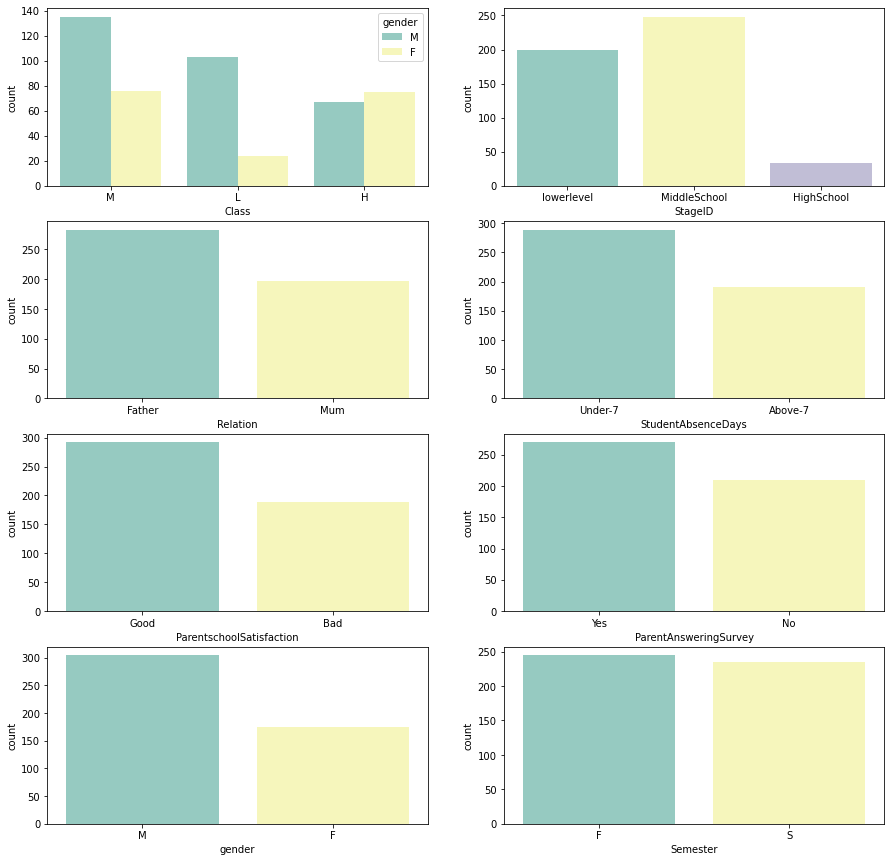

In [47]:
from matplotlib import pyplot as plt
fig,axarr =plt.subplots (4,2, figsize=(15,15))
sns.countplot(x='Class',data=df,palette="Set3",hue='gender',ax=axarr[0,0])
sns.countplot(x='StageID',data=df,palette="Set3", ax=axarr[0,1])
sns.countplot(x='Relation',data=df,palette="Set3", ax=axarr[1,0])
sns.countplot(x='StudentAbsenceDays',data=df,palette="Set3", ax=axarr[1,1])
sns.countplot(x='ParentschoolSatisfaction',data=df,palette="Set3", ax=axarr[2,0])
sns.countplot(x='ParentAnsweringSurvey',data=df,palette="Set3", ax=axarr[2,1])
sns.countplot(x='gender',data=df,palette="Set3", ax=axarr[3,0])
sns.countplot(x='Semester',data=df,palette="Set3", ax=axarr[3,1])

In [48]:
 x = pd.crosstab(df.Class,df.gender,normalize='columns')
x

gender,F,M
Class,,
H,0.428571,0.219672
L,0.137143,0.337705
M,0.434286,0.442623


<AxesSubplot:xlabel='Topic', ylabel='count'>

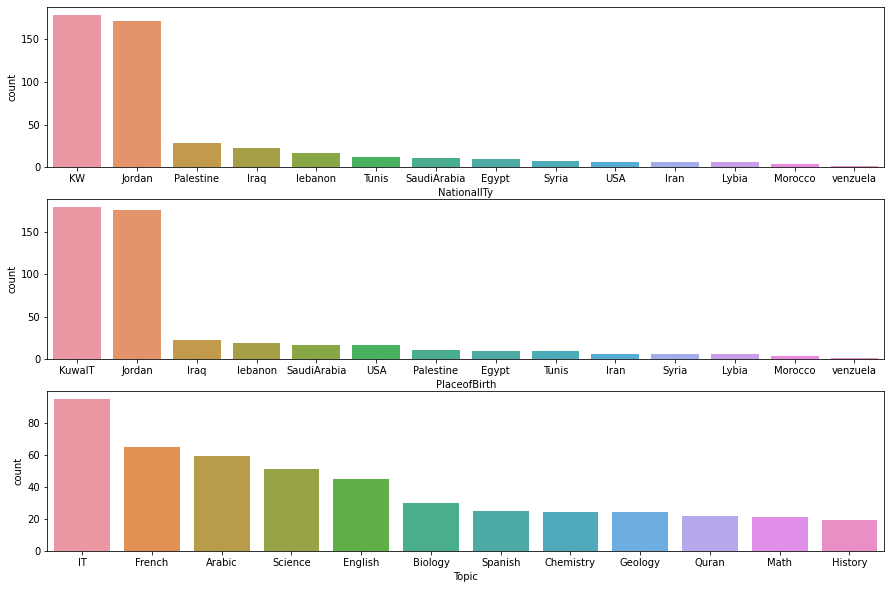

In [49]:
f, (axes1,axes2,axes3)= plt.subplots(3, 1,figsize=(15,10))
sns.countplot(x='NationalITy', data=df, ax=axes1,order = df['NationalITy'].value_counts().index)
sns.countplot(x='PlaceofBirth', data=df, ax=axes2,order = df['PlaceofBirth'].value_counts().index)
sns.countplot(x='Topic', data=df, ax=axes3,order = df['Topic'].value_counts().index)


* Highest of the students seems interested in IT subject
* Highest of the belongs to Kuwait
* Highest of the students have Grade G-02

<AxesSubplot:xlabel='gender', ylabel='count'>

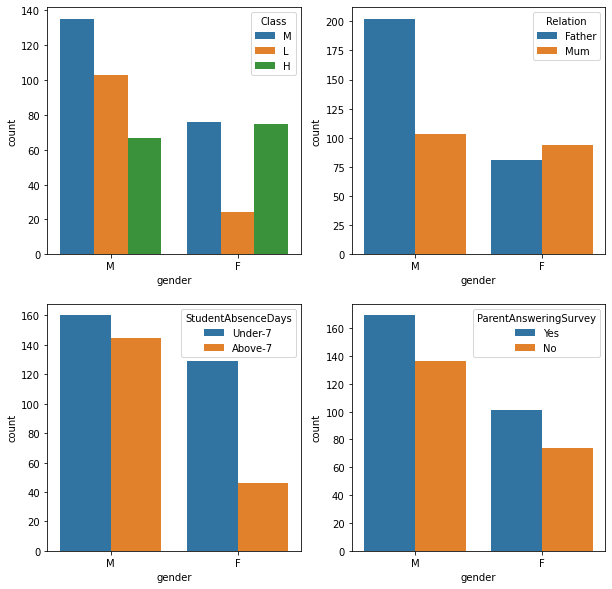

In [50]:
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.countplot(x='gender',hue="Class" ,data=df, ax=axes[0,0])
sns.countplot(x='gender',hue="Relation", data=df, ax=axes[0,1])
sns.countplot(x='gender',hue="StudentAbsenceDays", data=df,ax=axes[1,0])
sns.countplot(x='gender',hue="ParentAnsweringSurvey", data=df,ax=axes[1,1])

*  Boys are absent than girls
*  Mothers are more intrested in their education in case of girls

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

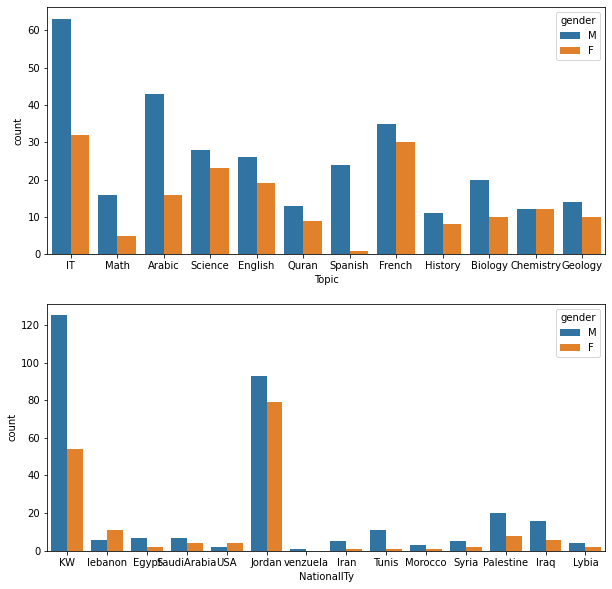

In [51]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Topic',hue='gender',data=df,ax=axis1)
sns.countplot(x='NationalITy',hue='gender',data=df, ax=axis2)

<AxesSubplot:xlabel='gender', ylabel='count'>

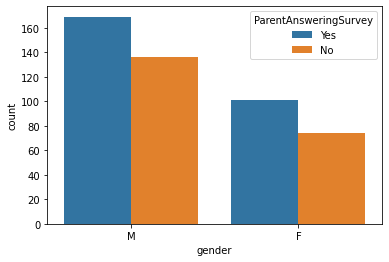

In [52]:
sns.countplot(x='gender',hue='ParentAnsweringSurvey',data=df)

* Males gives more response to survey than female

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

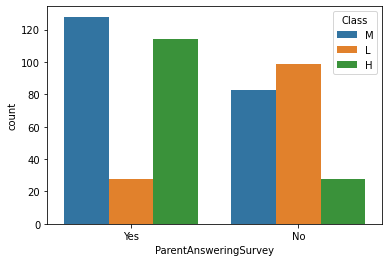

In [53]:
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=df)

* M-class parents gives maximum response to survey

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

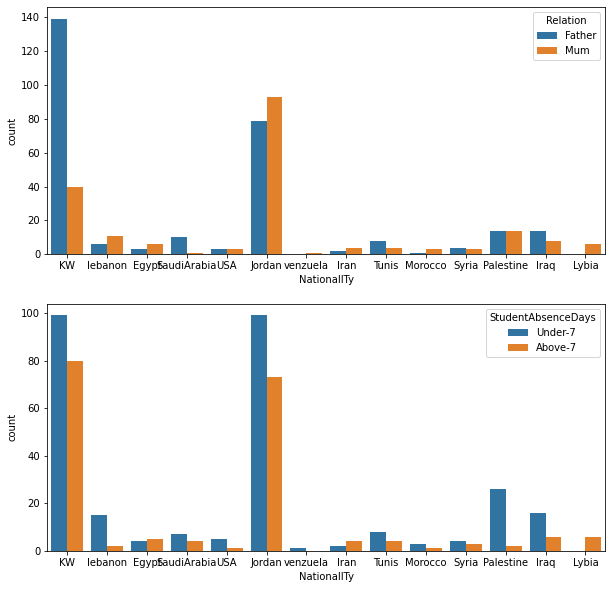

In [54]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='NationalITy',hue='Relation',data=df,ax=axis1)
sns.countplot(x='NationalITy',hue='StudentAbsenceDays',data=df, ax=axis2)

### Q2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

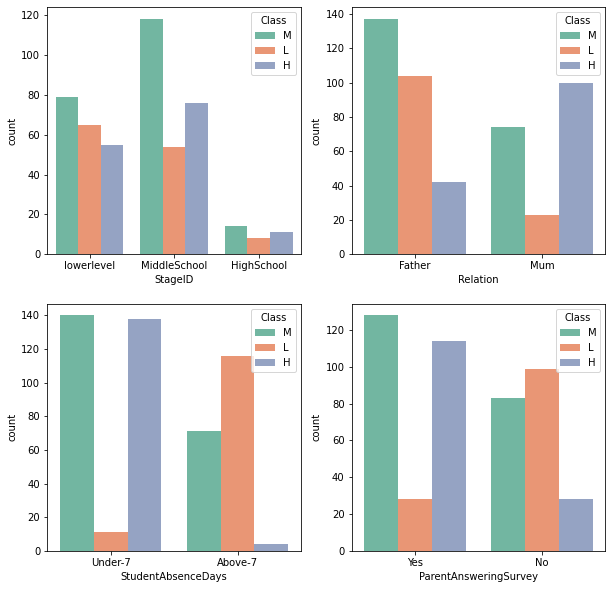

In [55]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.countplot(x='StageID',hue='Class',data=df,ax=axarr[0,0],palette='Set2')
sns.countplot(x='Relation',hue='Class',data=df, ax=axarr[0,1],palette='Set2')
sns.countplot(x='StudentAbsenceDays',hue='Class',data=df, ax=axarr[1,0],palette='Set2')
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=df, ax=axarr[1,1],palette='Set2')

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

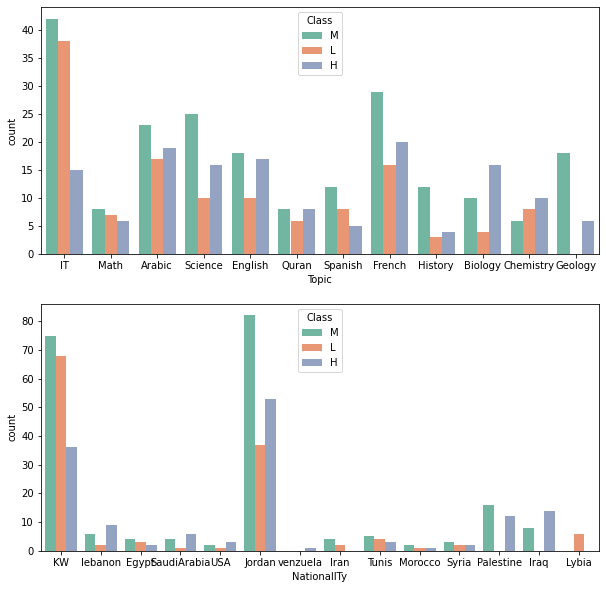

In [56]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Topic',hue='Class',data=df,ax=axis1,palette='Set2')
sns.countplot(x='NationalITy',hue='Class',data=df, ax=axis2,palette='Set2')

# Q3. Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

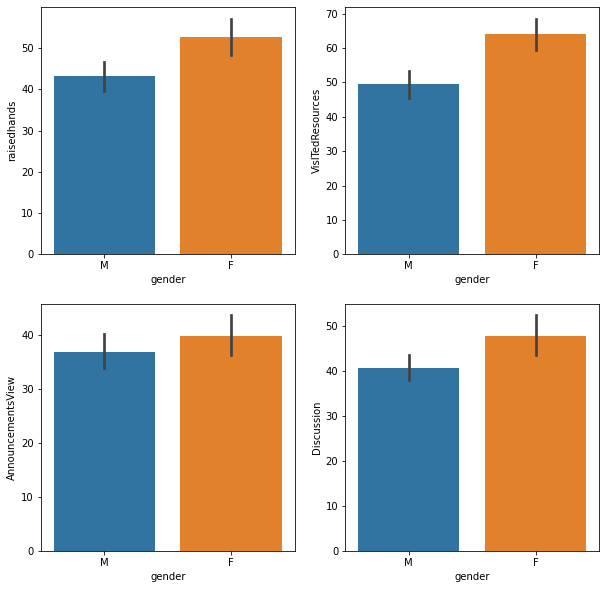

In [57]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.barplot(x='gender',y='raisedhands',data=df,ax=axarr[0,0])
sns.barplot(x='gender',y='VisITedResources',data=df, ax=axarr[0,1])
sns.barplot(x='gender',y='AnnouncementsView',data=df, ax=axarr[1,0])
sns.barplot(x='gender',y='Discussion',data=df, ax=axarr[1,1])


* Female mostly visit resources as compared to male
* Female views annoncements more than male
* Girls do more discussion than boys
* Boys do not raised more hands as compared to girls

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

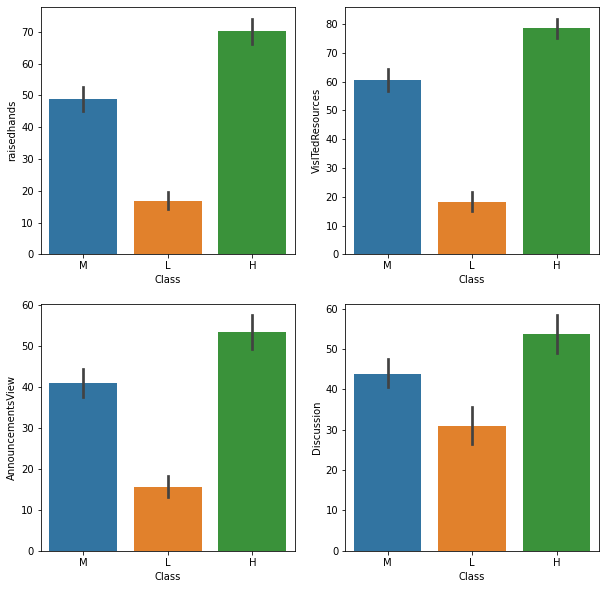

In [58]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.barplot(x='Class',y='raisedhands',data=df,ax=axarr[0,0])
sns.barplot(x='Class',y='VisITedResources',data=df, ax=axarr[0,1])
sns.barplot(x='Class',y='AnnouncementsView',data=df, ax=axarr[1,0])
sns.barplot(x='Class',y='Discussion',data=df, ax=axarr[1,1])

* It shows H-Class students are more interested in studies and innvolves in every activity.

#### Bad rate analysis

In [59]:
import plotly.express as px

fig = px.pie(df,names='ParentAnsweringSurvey',color='ParentAnsweringSurvey',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Q4. From the above result, what are the factors that leads to get low grades of the students?

* Low Grades are given to students who don't participate in discussions and activities
* Also, girls have more discussions than boys, which affects their grades
* The number of raised hands among girls affects the grade of boys as well
* Those who are receiving a lower grade due to the fact that they have not visited their resources
* As well as not asking questions and not participating in discussions

# Q5. Build classification model and present it's classification report?

In [60]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [61]:
import plotly.express as px

fig = px.pie(df,names='Class',color='Class',
             color_discrete_map={'M':'red',
                                 'H':'green',
                                'L':'blue'})
fig.show()

<AxesSubplot:>

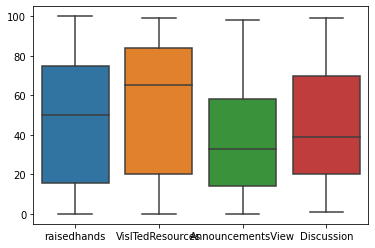

In [62]:
sns.boxplot(data=df)

# Breaking Data into Two Part
* Number Variable
* Category Variable

In [63]:
# Number Variable
number_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
number_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [64]:
# Category Variable
Category_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Category_Variable.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L


#### Converting qualitative Variable into number

In [65]:
from sklearn.preprocessing import LabelEncoder
Category_Variable=Category_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Category_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


# Combining the data set

In [66]:
Final_combined = pd.concat([Category_Variable,number_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# Data Partition
* Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [67]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model Building
H0 :- There is no log linear relationship between Class and all independent Variable
Vs

H1 :- There is log linear relationship between Class and all independent Variable

Alpha = 0.05 (5%)

# Method 2 - Logistics Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

E:\ana\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Predictions on Train Dataset

In [69]:
train=pd.concat([X_train,y_train],axis=1)
train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
268,1,3,3,1,3,0,3,0,0,1,0,0,10,8,10,10,2
446,1,3,3,1,5,0,5,0,1,1,1,1,77,82,74,79,2
44,0,4,4,0,6,0,7,0,0,0,0,1,33,33,30,90,2
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,4,4,1,4,1,10,1,0,0,0,0,12,8,18,26,1
418,1,7,3,1,4,1,1,0,0,1,1,1,88,90,76,81,0
192,1,4,4,1,5,0,0,1,1,1,1,1,95,91,62,53,2
399,1,7,7,1,4,0,1,1,0,1,1,1,89,92,89,83,0


In [70]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
268,1,3,3,1,3,0,3,0,0,1,0,0,10,8,10,10,2,1
446,1,3,3,1,5,0,5,0,1,1,1,1,77,82,74,79,2,0
44,0,4,4,0,6,0,7,0,0,0,0,1,33,33,30,90,2,2
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2,2
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2,2


# Model Performance Metrics

In [71]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 78,   0,  28],
       [  1,  85,  15],
       [ 35,  12, 130]], dtype=int64)

In [72]:
Accuracy_test=((78+85+130)/(384)*100)
Accuracy_test

76.30208333333334

* Accuracy of Model is 80% , So we say Model good fit data

In [73]:
from sklearn.metrics import classification_report


In [74]:
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       114
           1       0.84      0.88      0.86        97
           2       0.73      0.75      0.74       173

    accuracy                           0.76       384
   macro avg       0.77      0.77      0.77       384
weighted avg       0.76      0.76      0.76       384



# Train Data
* Accuracy of model is 76%, So model is good fit



# Predictions on Test Dataset

In [75]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
103,1,4,4,2,0,1,7,0,0,0,0,0,1,7,6,10,1
134,1,4,4,1,4,0,9,1,0,1,1,1,80,80,15,70,0
435,1,3,3,1,5,0,2,1,1,1,1,0,79,88,79,20,2
91,1,4,4,2,0,1,7,0,0,1,1,1,80,90,55,19,0
246,0,4,4,1,3,0,10,1,0,1,1,1,80,94,62,77,0


In [76]:
test['Predicted']=output.predict(X_test)
test

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
103,1,4,4,2,0,1,7,0,0,0,0,0,1,7,6,10,1,1
134,1,4,4,1,4,0,9,1,0,1,1,1,80,80,15,70,0,2
435,1,3,3,1,5,0,2,1,1,1,1,0,79,88,79,20,2,2
91,1,4,4,2,0,1,7,0,0,1,1,1,80,90,55,19,0,2
246,0,4,4,1,3,0,10,1,0,1,1,1,80,94,62,77,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,4,4,2,0,2,7,0,1,1,1,0,77,80,12,19,2,0
354,1,3,3,2,0,1,4,0,1,1,1,1,30,98,42,21,0,2
464,0,3,3,1,5,0,2,0,1,1,1,1,85,99,42,90,0,0
226,1,4,4,1,5,1,11,1,0,0,0,1,2,11,62,30,1,2


# Model Performance Metrics on Test data

In [77]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[21  0  6]
 [ 1 26  6]
 [ 6  4 26]]


In [78]:
Accuracy_test=((21+26+26)/(96)*100)
Accuracy_test

76.04166666666666

In [79]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.87      0.83        30
           2       0.72      0.68      0.70        38

    accuracy                           0.76        96
   macro avg       0.76      0.77      0.76        96
weighted avg       0.76      0.76      0.76        96



In [80]:
output.intercept_,output.coef_

(array([-0.79069917,  0.65550684,  0.13519233]),
 array([[-1.00058441e+00, -5.37439551e-02,  7.77400807e-02,
         -1.43056743e+00, -4.30417665e-01, -7.95576544e-02,
         -5.16216837e-02, -1.46034774e-01,  6.13741476e-01,
          5.64898456e-01,  2.86756948e-01,  9.49479373e-01,
          2.69390926e-02,  1.87548819e-02,  1.43087752e-02,
          1.39670923e-02],
        [ 8.69680911e-01,  5.34471560e-02, -4.31434251e-02,
          1.28667111e+00,  3.78394297e-01,  1.90564266e-01,
         -2.62269533e-02,  4.39262211e-01,  2.80162871e-02,
         -4.65075862e-01, -1.50200386e-01, -1.11634105e+00,
         -2.96010692e-02, -2.64511406e-02, -3.32298634e-02,
         -9.79589797e-03],
        [ 1.30903502e-01,  2.96799128e-04, -3.45966557e-02,
          1.43896322e-01,  5.20233681e-02, -1.11006612e-01,
          7.78486370e-02, -2.93227437e-01, -6.41757763e-01,
         -9.98225940e-02, -1.36556562e-01,  1.66861675e-01,
          2.66197662e-03,  7.69625873e-03,  1.89210882e-0

# Test Data
* Accuracy of model is 76%, So model is good fit

